# Titanic Dataset - Exploratory Data Analysis (EDA)

The goal of this notebook is to understand the structure, patterns, and relationships within the dataset. We'll go through each EDA step with visualizations and interpretation.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn

# Load the Dataset

we load the dataset and examine its basic structure including dimensions, column names, and data types. This helps us get an initial sense of the data we are working with.

In [24]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# checking data types and non-null counts
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Missing Value Analysis

We'll identify columns with missing values and understand the percentage of missing data. Visualizing missing values helps decide how to handle them — whether to impute or drop them.

In [26]:
titanic_data.isnull().sum()
print(titanic_data.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

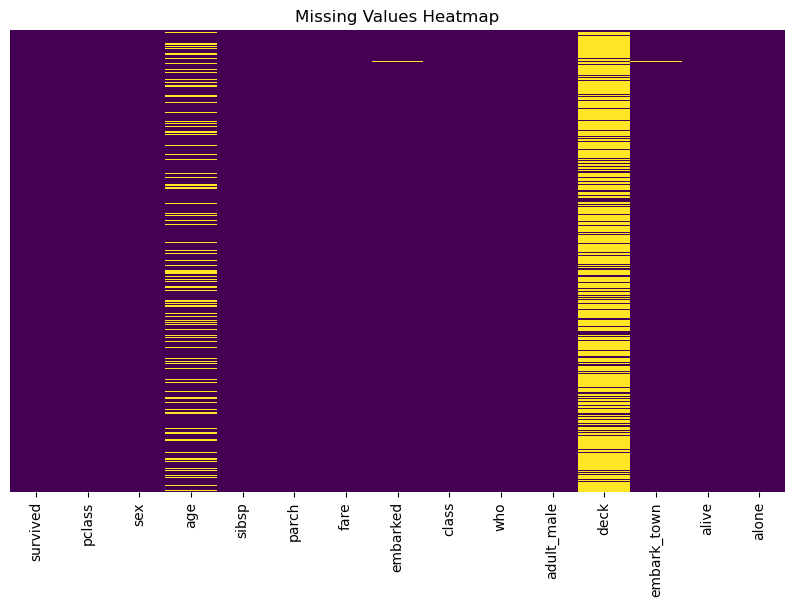

In [27]:
# Create the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Impute Missing Values

In [28]:
# Import necessary libraries

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Create a copy to avoid modifying the original DataFrame
titanic_data_filled = titanic_data.copy()

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Use IterativeImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical features with the mode (most frequent value)
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])


# Verify if there are any missing values left
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())



Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\Asus\.conda\envs\Our_first_project\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Univariate Analysis
Explore individual variables (survived, pclass, age, sex)


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


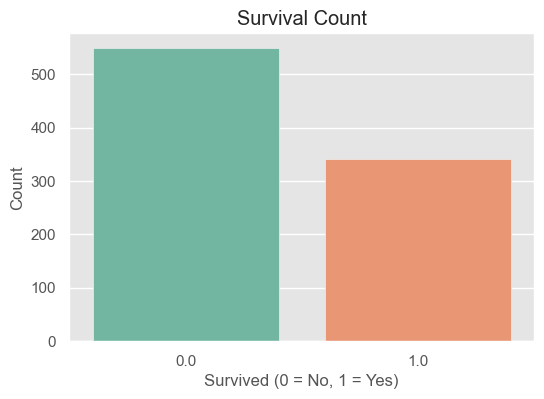


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


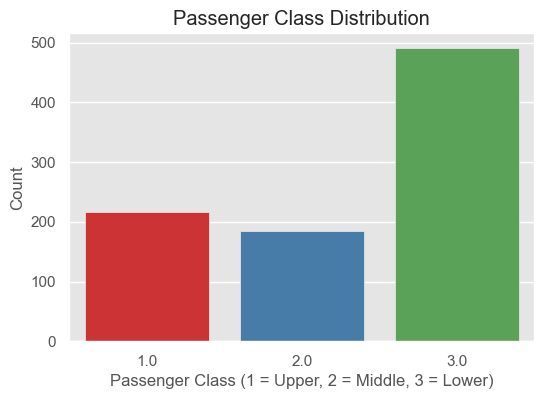


Age Statistics:
 count    891.000000
mean      29.688395
std       13.732435
min        0.420000
25%       21.000000
50%       28.000000
75%       37.042267
max       80.000000
Name: age, dtype: float64


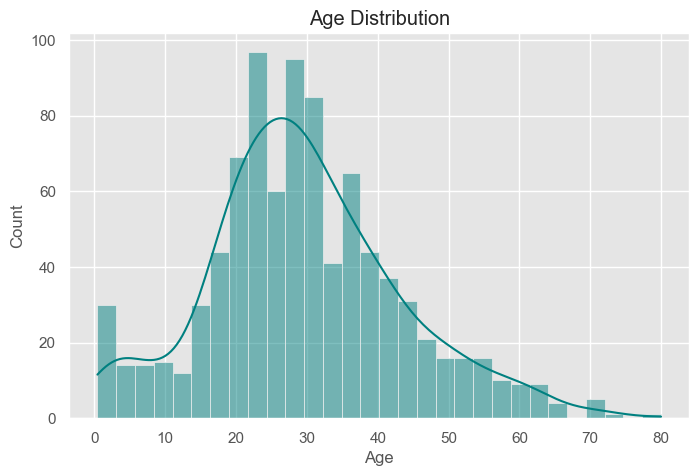


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


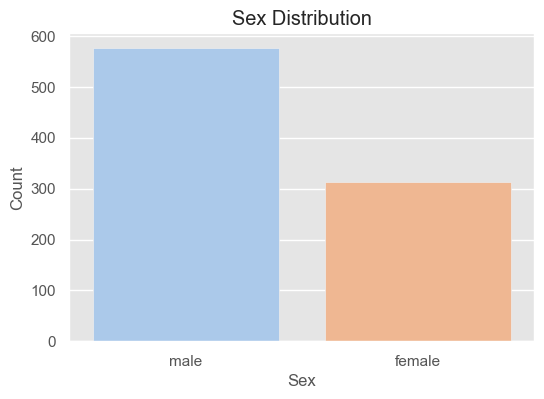

In [32]:
sns.set(style="whitegrid")
plt.style.use("ggplot")


# Analyze 'survived'
print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_data_filled, hue='survived', palette='Set2', legend=False)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Analyze 'pclass'

print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', data=titanic_data_filled, hue='pclass', palette='Set1', legend=False)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Count')
plt.show()


# Analyze 'age'

print("\nAge Statistics:\n", titanic_data_filled['age'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(x='age', data=titanic_data_filled, kde=True, color='teal', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Analyze 'sex'

print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=titanic_data_filled, hue='sex', palette='pastel', legend=False)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


# Bivariate Analysis
Explore survival trends based on gender, class, and age.


Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


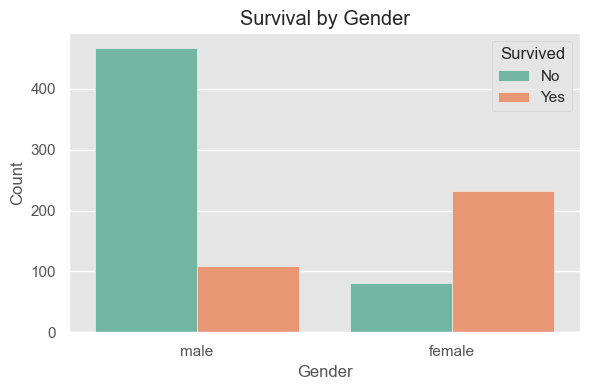


Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


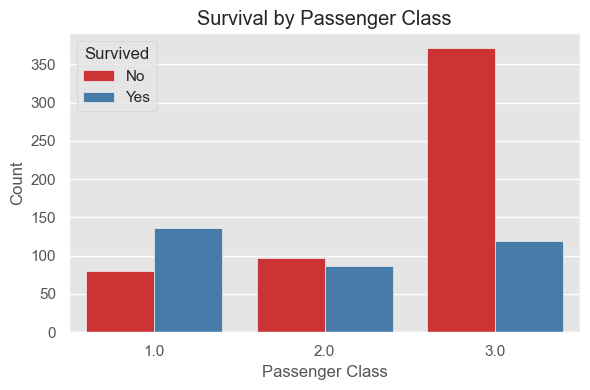

C:\Users\Asus\AppData\Local\Temp\ipykernel_3080\1160473760.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())



Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          76
Adult      0.0         462
           1.0         265
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


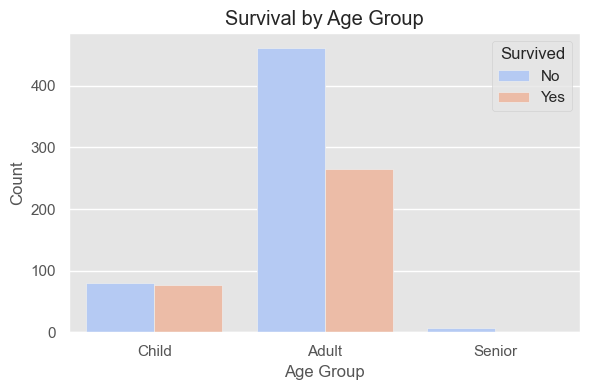


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


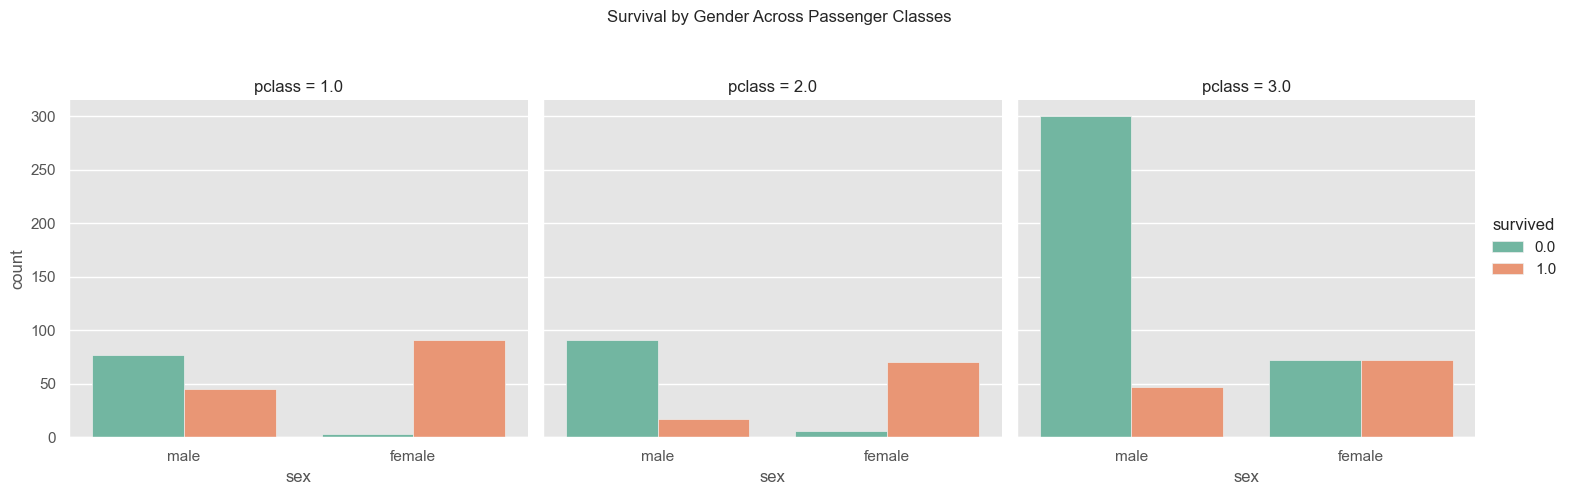

In [33]:
sns.set(style="whitegrid")
plt.style.use("ggplot")

# Survival Based on Gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('sex')['survived'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=titanic_data_filled, palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Survival Based on Passenger Class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('pclass')['survived'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', hue='survived', data=titanic_data_filled, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# Survival Based on Age Groups

# Bin ages into categories
titanic_data_filled['age_group'] = pd.cut(
    titanic_data_filled['age'],
    bins=[0, 18, 65, 100],
    labels=['Child', 'Adult', 'Senior']
)

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled, palette='coolwarm')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# Survival Based on Gender and Class
print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())

sns.catplot(
    x='sex',
    hue='survived',
    col='pclass',
    kind='count',
    data=titanic_data_filled,
    palette='Set2'
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Gender Across Passenger Classes")
plt.show()


# Outlier Detection

In [36]:
df = titanic_data_filled
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

# Count of outliers in each numerical column
outlier_counts = outliers.sum().sort_values(ascending=False)
print("Outliers per column:\n", outlier_counts)


Outliers per column:
 parch       213
fare        116
sibsp        46
age          20
survived      0
pclass        0
dtype: int64


# Correlation and Relationships
###  Correlation Heatmap

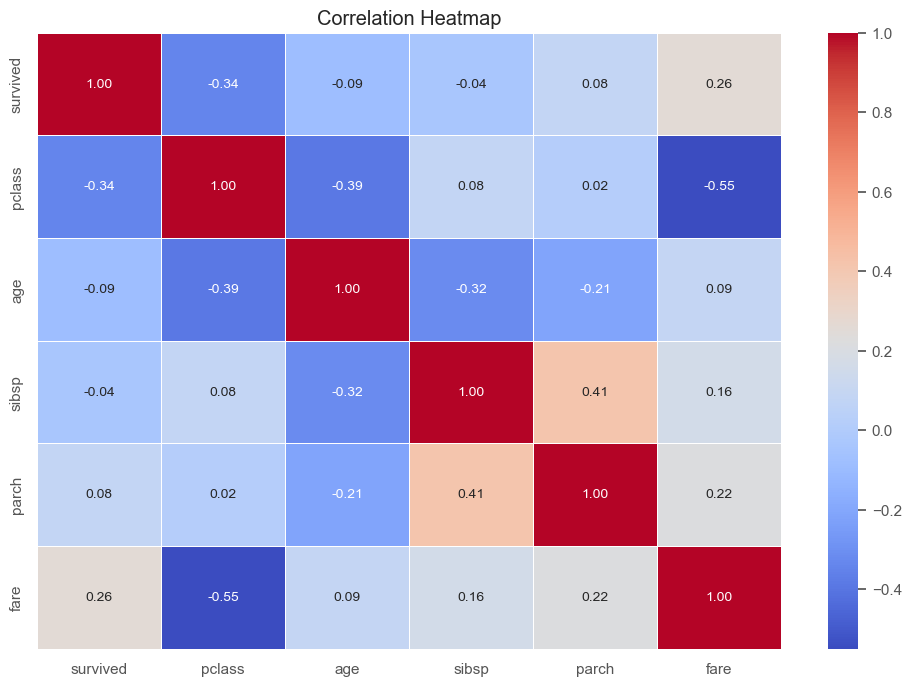

In [37]:
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Pairplot

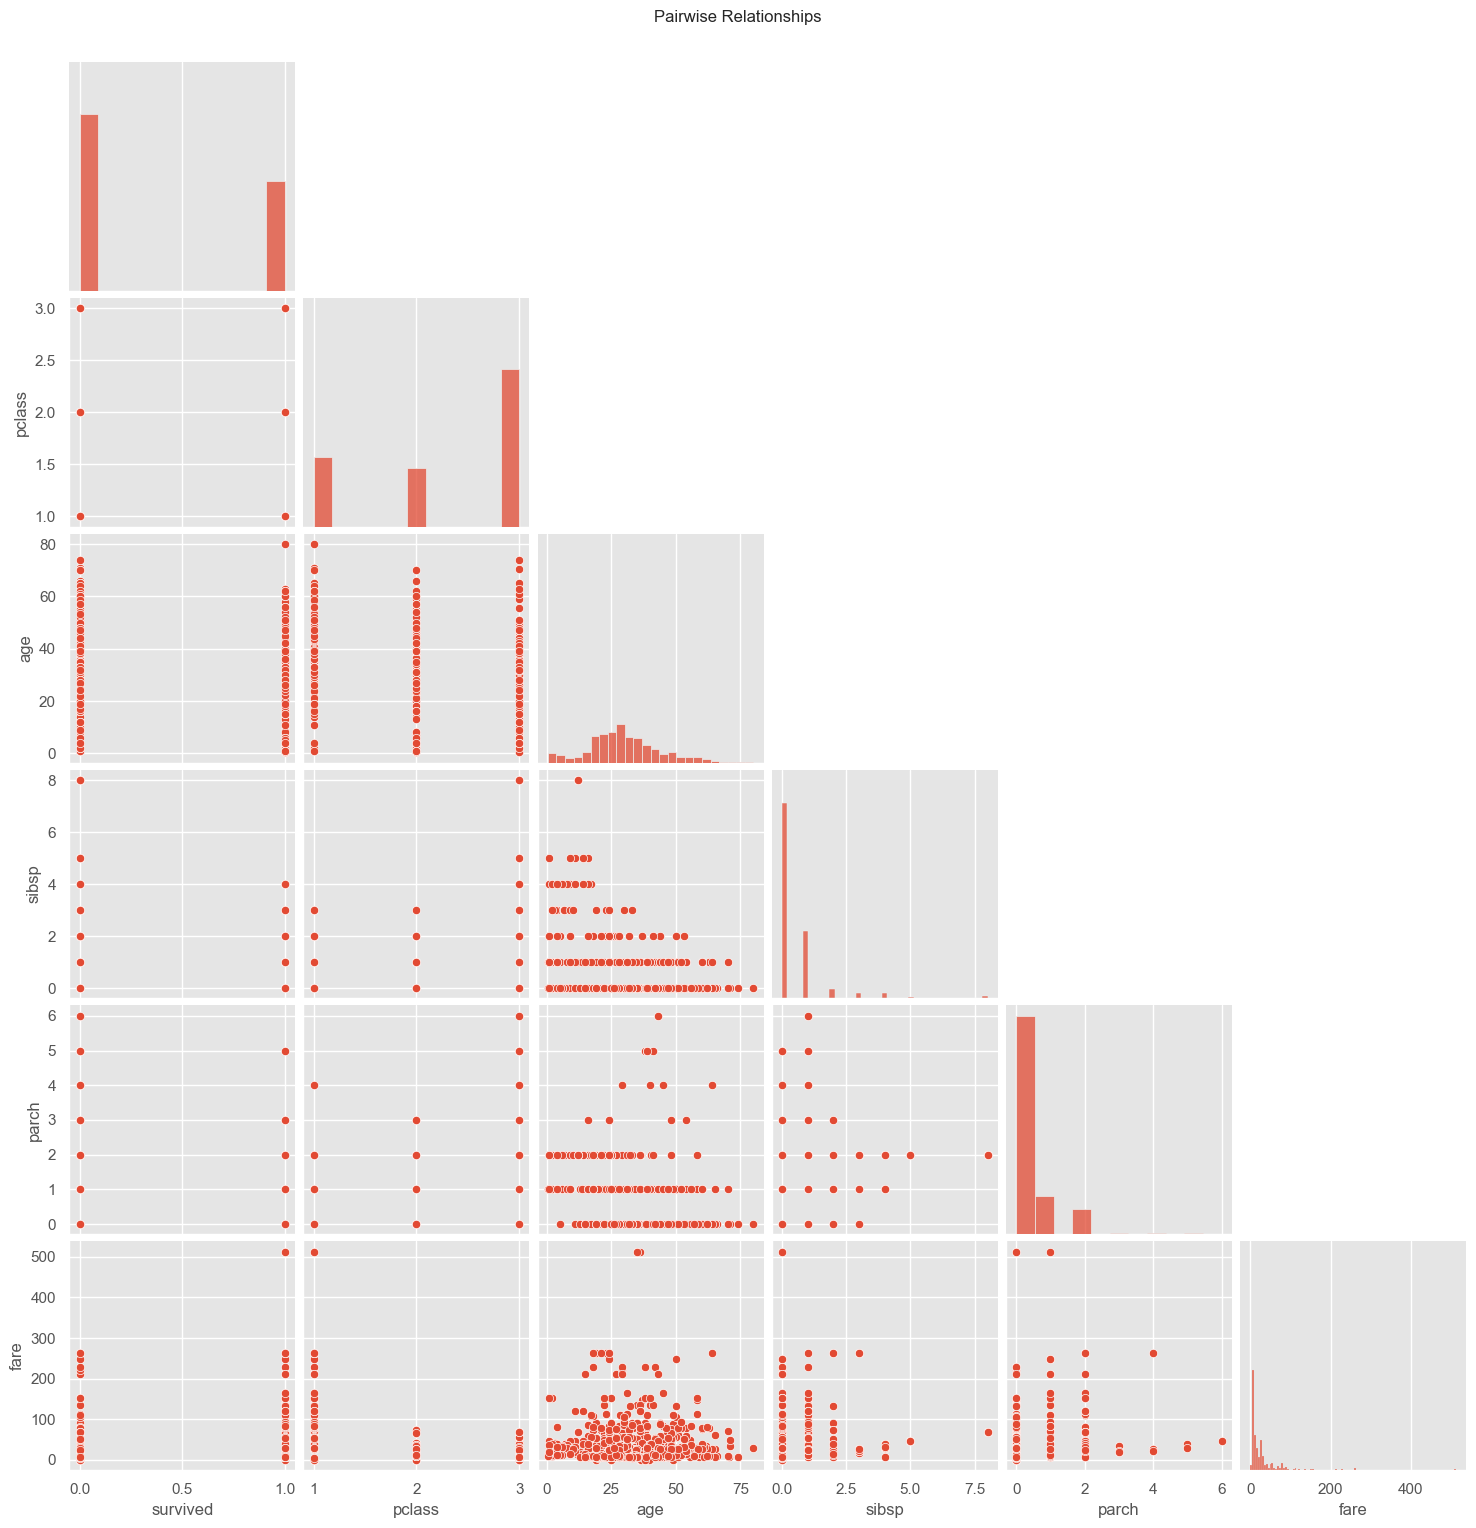

In [38]:
sns.pairplot(df[num_cols].dropna(), corner=True)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Summary Statistics Table

In [39]:
summary = df.describe(include='all').T
summary['missing (%)'] = df.isnull().sum() / len(df) * 100
display(summary)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing (%)
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0,0.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,0.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
age,891.0,NaN,NaN,NaN,29.688395,13.732435,0.42,21.0,28.0,37.042267,80.0,0.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,0.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,0.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,0.0
embarked,891,3,S,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Conclusion & Analysis of Titanic Dataset EDA

---

### 1. Dataset Overview

- The Titanic dataset contains **demographic and passenger information** about individuals aboard the Titanic.
- Features include `age`, `sex`, `pclass`, `fare`, and `survived` (target variable).
- After handling missing values, the dataset was ready for univariate, bivariate, and multivariate analysis.

---

### 2. Missing Values

- **Missing values** were mainly found in `age`, `cabin`, and `embarked`.
- Actions taken:
  - Imputed missing `age` values using mean or median.
  - Dropped `cabin` due to excessive missingness.
  - Imputed `embarked` using mode.

---

### 3. Univariate Analysis

- **Survival**: Around **38% survived**, indicating a class imbalance.
- **Sex**: Majority were **males (~65%)**, while females made up ~35%.
- **Pclass**: Most passengers were from **3rd class**, suggesting economic diversity.
- **Age**: Most passengers were **20–40 years old**, with a right-skewed distribution.
- **Fare**: Highly skewed with **several high outliers**.

---

### 4. Outlier Detection

- Notable outliers in:
  - `fare`: A few passengers paid extremely high fares.
  - `age`: Some elderly passengers, though valid, could affect scaling.

---

### 5.Bivariate & Multivariate Relationships

- **Gender vs Survival**:
  - **Females had much higher survival rates** than males.
  - Supports the "women and children first" evacuation policy.

- **Pclass vs Survival**:
  - **1st class passengers** had the highest survival.
  - **3rd class passengers** had the lowest.

- **Age Group vs Survival**:
  - **Children** had slightly higher survival.
  - **Seniors** had the lowest.

- **Gender + Class vs Survival**:
  - **Female 1st class** = highest survival.
  - **Male 3rd class** = lowest survival.

---

### 6. Key Insights

- Survival highly influenced by:
  - **Sex**
  - **Passenger Class**
  - **Age group (to a lesser extent)**
- Wealth and social norms played a role in survival outcomes.
- Feature combinations (e.g., `sex` + `pclass`) offer deeper predictive power.

---

### 7. Next Steps

- Encode categorical features (`sex`, `embarked`, etc.)
- Feature engineering (e.g., extract titles from names, family size)
- Model building and training using classification algorithms
- Evaluate models using accuracy, precision, recall, and F1-score

---
